In [158]:
%matplotlib inline

from pathlib import Path

import pydotplus
from IPython.display import Image
import numbers

import pandas as pd

## 1. credit card use

In [151]:
cc = pd.DataFrame({'Years':[4,18,1,3,15,6], # 고객이 은행과 거래한 연수 
                             'Income':[43,65,53,95,88,112], # 고객의 연봉
                             'Used_credit':[0,1,0,0,1,1]}) # 1 : 사용액이 남음 / 0 : 모두 지불
cc

,Years,Income,Used_credit
0,4,43,0
1,18,65,1
2,1,53,0
3,3,95,0
4,15,88,1
5,6,112,1


In [152]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [153]:
predictors=['Years','Income']
outcome='Used_credit'

X=cc[predictors]
y=cc[outcome]

classes=sorted(y.unique())
clf=MLPClassifier(hidden_layer_sizes=(3),activation='logistic',solver='lbfgs',random_state=1)


In [154]:
clf.fit(X,y)
clf.predict(X)

print('Intercepts')
print(clf.intercepts_)
print('Weights')
print(clf.coefs_)

print(pd.concat([cc,pd.DataFrame(clf.predict_proba(X),columns=classes)], axis=1))

Intercepts
[array([-0.39685328, -0.19535194, -0.13057996]), array([2.33295553e-05])]
Weights
[array([[-0.10494688,  0.27865319, -0.63222532],
       [-0.2500133 , -0.44676191, -0.51558567]]), array([[ 0.05488134],
       [-0.11426076],
       [ 0.2619045 ]])]
   Years  Income  Used_credit         0         1
0      4      43            0  0.499994  0.500006
1     18      65            1  0.499994  0.500006
2      1      53            0  0.499994  0.500006
3      3      95            0  0.499994  0.500006
4     15      88            1  0.499994  0.500006
5      6     112            1  0.499994  0.500006


In [155]:
def unbiasedNode(id, label=None, output=None, style=None):
    label = label or f'N{id}'
    common = style or 'shape=record, style=rounded, color=gray26'
    if output is None:
        return f'{id} [ label="{label}", fontsize=11, {common} ];'
    return f'{id} [ label="{{ {label} | {output:.2f} }}", fontsize=11, {common} ];'

def biasedNode(id, bias, label=None, output=None):
    label = label or f'N{id}'
    if isinstance(bias, numbers.Number):
        bias = f'{bias:.3f}'
    if isinstance(output, numbers.Number):
        output = f'{output:.3f}'
    common = 'shape=record, style=rounded, fontsize=11, color=gray26'
    if output is None:
        return f'{id} [ label="{label}&#92;n{bias}", {common} ];'
    return f'{id} [ label="{{ {label}&#92;n{bias} | {output} }}", {common} ];'

def edge(n1, n2, weight=None):
    if weight is None:
        return f'{n1} -> {n2} [ label="w{n1}{n2}" ];'
    return f'{n1} -> {n2} [ label="{weight:.3f}" ];'

In [159]:
def layoutGraph(dot_data, pdfFile=None):
    graph = pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

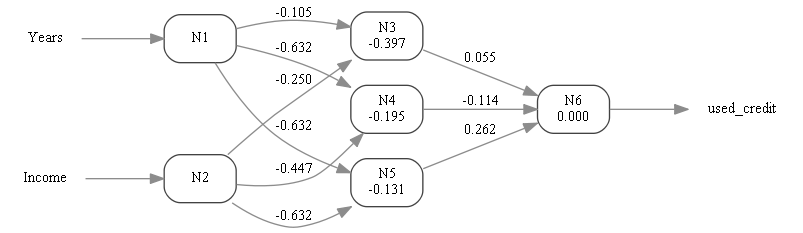

In [164]:
commonSettings = """
edge [ fontsize=11, color=gray55 ];
rankdir=LR;
# size="10,10"
graph [ranksep="0.8"];
"""
# node [shape=record, style=rounded, fontsize=11, color=gray26]; 

s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Income', label='Income', style='color=white') }
{ unbiasedNode('Years', label='Years', style='color=white') }

    { unbiasedNode(2) }
    { unbiasedNode(1) }
    { biasedNode(4, -0.19535194)}
    { biasedNode(3, -0.39685328)}
    { biasedNode(5, -0.13057996)}
    { biasedNode(6, 2.33295553e-05)}

{ unbiasedNode('used_credit', label='used_credit', style='color=white') }
Income -> 2;
Years -> 1;

{ edge(1, 3, -0.10494688) }
{ edge(2, 3, -0.2500133) }

{ edge(1, 4, -0.63222532) }
{ edge(2, 4, -0.44676191) }

{ edge(1, 5, -0.63222532) }
{ edge(2, 5, -0.63222532) }

{ edge(3, 6, 0.05488134) }
{ edge(4, 6, -0.11426076) }
{ edge(5, 6, 0.2619045 ) }
6 -> used_credit
 }}
 """
layoutGraph(s, pdfFile='network-optimized.pdf')

## 2. Neural Net Evolution

In [3]:
## 임의의 계수로 시작하기 때문에 <임의의 예측값> 출력

추정된 연결강도를 반복적으로 갱신하기 위해 오차를 사용하는데 반복횟수가 많이 늘어나는 것에 주의해야 한다.

은닉층 노드의 수를 변화하며 정오행렬 검토가 필요

## 3. Car Sales

In [121]:
toyota = pd.read_csv('ToyotaCorolla.csv')

In [122]:
toyota_x=toyota[[ 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee',
       'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']]
toyota_x.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
0,23,46986,Diesel,90,0,3,210,0,3,0,0,0,1,0,0
1,23,72937,Diesel,90,0,3,210,0,3,1,0,1,0,0,0
2,24,41711,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
3,26,48000,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
4,30,38500,Diesel,90,0,3,210,1,3,1,0,0,1,0,0


In [123]:
toyota_x.dtypes

Age_08_04            int64
KM                   int64
Fuel_Type           object
HP                   int64
Automatic            int64
Doors                int64
Quarterly_Tax        int64
Mfr_Guarantee        int64
Guarantee_Period     int64
Airco                int64
Automatic_airco      int64
CD_Player            int64
Powered_Windows      int64
Sport_Model          int64
Tow_Bar              int64
dtype: object

In [124]:
toyota_x = pd.get_dummies(toyota_x, columns=['Fuel_Type'], drop_first=True)
toyota_x

,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,1,0
1,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,1,0
2,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,1,0
3,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,1,0
4,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,3,69,1,3,1,0,0,1,1,0,0,1
1432,72,19000,86,0,3,69,0,3,0,0,0,0,1,0,0,1
1433,71,17016,86,0,3,69,0,3,0,0,0,0,0,0,0,1
1434,70,16916,86,0,3,69,1,3,0,0,0,0,0,0,0,1


In [125]:
toyota_y=toyota[["Price"]]

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
toyota_x_std = scaler.fit_transform(toyota_x)
toyota_y_std = scaler.fit_transform(toyota_y)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
train_X, valid_X, train_y, valid_y = train_test_split(toyota_x_std, toyota_y_std, test_size=0.4, random_state=1)

In [129]:
from dmba import regressionSummary, exhaustive_search

In [136]:
# 학습데이터
X=train_X
y=train_y

clf=MLPRegressor(hidden_layer_sizes=(2),activation='logistic',solver='lbfgs',random_state=1)

clf.fit(X,y)
clf.predict(X)


# Compute common accuracy measures
regressionSummary(train_y, clf.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0004
       Root Mean Squared Error (RMSE) : 0.2897
            Mean Absolute Error (MAE) : 0.2180
          Mean Percentage Error (MPE) : 19.5519
Mean Absolute Percentage Error (MAPE) : 103.9578


C:\Users\ajm10\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ajm10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [137]:
clf=MLPRegressor(hidden_layer_sizes=(5),activation='logistic',solver='lbfgs',random_state=1)

clf.fit(X,y)
clf.predict(X)


# Compute common accuracy measures
regressionSummary(train_y, clf.predict(train_X))

C:\Users\ajm10\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ajm10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



Regression statistics

                      Mean Error (ME) : -0.0004
       Root Mean Squared Error (RMSE) : 0.2521
            Mean Absolute Error (MAE) : 0.1927
          Mean Percentage Error (MPE) : 25.5538
Mean Absolute Percentage Error (MAPE) : 100.0495


In [138]:
clf=MLPRegressor(hidden_layer_sizes=(1,1,1,1),activation='logistic',solver='lbfgs',random_state=1)

clf.fit(X,y)
clf.predict(X)


# Compute common accuracy measures
regressionSummary(train_y, clf.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1.0223
            Mean Absolute Error (MAE) : 0.7381
          Mean Percentage Error (MPE) : 97.5653
Mean Absolute Percentage Error (MAPE) : 100.5048


C:\Users\ajm10\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [139]:
# 검증데이터
X=valid_X
y=valid_y

clf=MLPRegressor(hidden_layer_sizes=(2),activation='logistic',solver='lbfgs',random_state=1)

clf.fit(X,y)
clf.predict(X)


# Compute common accuracy measures
regressionSummary(valid_y, clf.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.2691
            Mean Absolute Error (MAE) : 0.2084
          Mean Percentage Error (MPE) : -2.4951
Mean Absolute Percentage Error (MAPE) : 133.3953


C:\Users\ajm10\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [140]:
clf=MLPRegressor(hidden_layer_sizes=(5),activation='logistic',solver='lbfgs',random_state=1)

clf.fit(X,y)
clf.predict(X)


# Compute common accuracy measures
regressionSummary(valid_y, clf.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0002
       Root Mean Squared Error (RMSE) : 0.2374
            Mean Absolute Error (MAE) : 0.1848
          Mean Percentage Error (MPE) : -9.2626
Mean Absolute Percentage Error (MAPE) : 119.5594


C:\Users\ajm10\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ajm10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [141]:
clf=MLPRegressor(hidden_layer_sizes=(1,1,1,1),activation='logistic',solver='lbfgs',random_state=1)

clf.fit(X,y)
clf.predict(X)


# Compute common accuracy measures
regressionSummary(valid_y, clf.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.9654
            Mean Absolute Error (MAE) : 0.7018
          Mean Percentage Error (MPE) : 103.8358
Mean Absolute Percentage Error (MAPE) : 103.8358


C:\Users\ajm10\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## 4. Direct Mailing to Airline Customers

In [120]:
ewair_X_std # 왜 NaN 이 발생하는지 모르겠음

array([[-0.44920373, -0.38118674, -0.1839366 , ...,  0.7358225 ,
        -0.31769098,  0.93039976],
       [-0.44920373, -0.47626444, -0.1839366 , ..., -1.3590234 ,
        -0.31769098, -1.07480681],
       [-0.44920373, -0.24003926, -0.1839366 , ...,  0.7358225 ,
        -0.31769098,  0.93039976],
       ...,
       [-0.44920373, -0.67652697, -0.1839366 , ..., -1.3590234 ,
        -0.31769098, -1.07480681],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [142]:
ewair = pd.read_csv('EastWestAirlinesNN.csv')

In [143]:
ewair=ewair.dropna()

In [144]:
ewair.drop(columns=['ID#'], inplace=True)
ewair.head(5)

,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo,Phone_sale
0,0.0,28143.0,0.0,0.0,1.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,19244.0,0.0,0.0,0.0,0.0,215.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,41354.0,0.0,1.0,0.0,0.0,4123.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,14776.0,0.0,0.0,0.0,0.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,97752.0,0.0,1.0,0.0,0.0,43300.0,26.0,2077.0,4.0,0.0,1.0,0.0,1.0,0.0


In [145]:
ewair_X=ewair[['Topflight', 'Balance', 'Qual_miles', 'cc1_miles?', 'cc2_miles?',
       'cc3_miles?', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo',
       'Flight_trans_12', 'Online_12', 'Email', 'Club_member',
       'Any_cc_miles_12mo']]

ewair_y=ewair[['Phone_sale']]

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ewair_X_std = scaler.fit_transform(ewair_X)
ewair_y_std = ewair_y

In [148]:
train_X, valid_X, train_y, valid_y = train_test_split(ewair_X_std, ewair_y_std, test_size=0.4, random_state=1)

In [150]:
liftChart(train_X, labelBars=False)
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [149]:
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

#### a

In [94]:
df = pd.DataFrame({'actual':train_y,'p':classTree.predict(train_X)})
df = df.sort_values(by=['p'],ascending=False).reset_index(drop=True)

NameError: name 'classTree' is not defined

#### b

#### c